In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile
from io import BytesIO


In [2]:
file_path = '../moses/dataset/data/ZINC/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:    
        file = 'train.csv'
        with zip_ref.open(file) as file:
            # Read the CSV file into a pandas DataFrame
            df= pd.read_csv(BytesIO(file.read()), header=0)

df['objective'] = 5*df['qed'] - df['SAS']

print(f'data size: {df.shape[0]}')
df.shape, df.head()


data size: 1584663


((1584663, 6),
                                    SMILES  \
 0  CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1   
 1    CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1   
 2     Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO   
 3        Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C   
 4          CC1Oc2ccc(Cl)cc2N(CC(O)CO)C1=O   
 
                                              SELFIES     logP       qed  \
 0  [C][C][C][S][=Branch1][C][=O][C][=C][C][=C][NH...  1.68070  0.896898   
 1  [C][C][Branch1][C][C][Branch1][C][C][C][=Branc...  3.72930  0.862259   
 2  [C][C][=C][Branch1][C][Cl][C][=C][C][=C][Ring1...  2.29702  0.701022   
 3  [C][N][C][=N][C][=C][Ring1][Branch1][C][=Branc... -2.21310  0.646083   
 4  [C][C][O][C][=C][C][=C][Branch1][C][Cl][C][=C]...  0.80710  0.853457   
 
         SAS  objective  
 0  3.812618   0.671873  
 1  2.936327   1.374970  
 2  2.663795   0.841316  
 3  2.989161   0.241255  
 4  3.055750   1.211533  )

In [4]:
save_path = '../checkpoints/optimize_gpr/'

In [5]:
## create dataframe with data for GPR fitting (training)
size = 2000
np.random.seed(0)
rand_indices = np.random.choice(len(df), size, replace=False)
gpr_fit_df = df.iloc[rand_indices]
gpr_fit_df.to_csv(f'{save_path}gpr_fit_df.csv', index=False)

print(f'data size: {gpr_fit_df.shape[0]}')
gpr_fit_df.head()

data size: 2000


,SMILES,SELFIES,logP,qed,SAS,objective
1484353,COCCCCSc1nc2c(c(=O)[nH]1)CCC2,[C][O][C][C][C][C][S][C][=N][C][=C][Branch1][B...,1.77730,0.477440,2.629071,-0.241872
687287,Cc1csc(=O)n1CC(=O)NCCc1ccccc1Cl,[C][C][=C][S][C][=Branch1][C][=O][N][Ring1][=B...,2.23052,0.920477,2.108029,2.494356
1219398,Cc1cccc(NC(=O)N(CCC#N)Cc2ccccn2)c1C,[C][C][=C][C][=C][C][Branch2][Ring1][=Branch1]...,3.64622,0.916358,2.182469,2.399320
189502,Cc1ccc(C2=CCN(C(=O)c3ccc[nH]c3=O)CC2)cc1,[C][C][=C][C][=C][Branch2][Ring1][Branch2][C][...,2.61282,0.925364,2.260791,2.366030
1105259,Cn1c(-c2cccc(N)c2)nc2ccc(F)c(F)c21,[C][N][C][Branch1][N][C][=C][C][=C][C][Branch1...,3.10070,0.682311,2.308511,1.103043


In [8]:
## create dataframe with data for optimization start points
size = 5
np.random.seed(0)

opt_start_df = df[(df['objective'] > 1) & (df['objective'] < 2)]

rand_indices = np.random.choice(len(opt_start_df), size, replace=False)
opt_start_df = opt_start_df.iloc[rand_indices]
opt_start_df.to_csv(f'{save_path}opt_start_df.csv', index=False)

print(f'data size: {opt_start_df.shape[0]}')
opt_start_df.head()

data size: 5


,SMILES,SELFIES,logP,qed,SAS,objective
336362,O=C(Nc1cccc(O)c1)c1ccccc1-n1cnnn1,[O][=C][Branch1][=N][N][C][=C][C][=C][C][Branc...,1.62020,0.760604,2.034326,1.768693
421217,Cc1cc2c(NCCC(=O)NCc3cccnc3)ncnc2s1,[C][C][=C][C][=C][Branch2][Ring1][C][N][C][C][...,2.51312,0.727036,2.327182,1.307999
1418661,COCCN1CCN(C(=O)c2ccc(Cn3ccnc3)cc2)CC1=O,[C][O][C][C][N][C][C][N][Branch2][Ring1][#Bran...,0.86220,0.780937,2.271511,1.633172
1395012,Cc1ccc2ncc(C(=O)NCC3CCOC3C(C)C)n2c1,[C][C][C][=C][C][=N][C][=C][Branch2][Ring1][Ri...,2.43362,0.943391,3.555418,1.161539
160094,N#Cc1ccccc1OCC(=O)N1CCC2CCCCC2C1,[N][#C][C][=C][C][=C][C][=C][Ring1][=Branch1][...,2.97578,0.861747,2.830672,1.478065


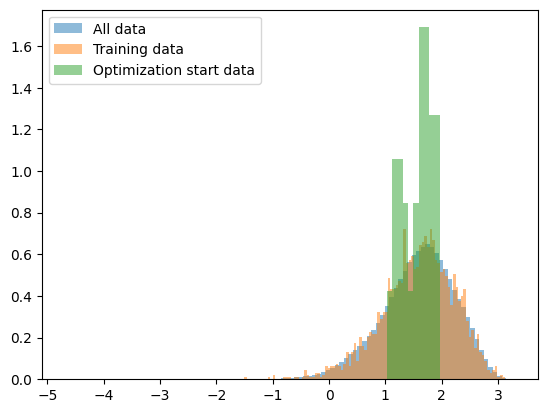

In [7]:
# plot the distribution of objective values of df and gpr_train_df
plt.figure()
plt.hist(df['objective'], bins=100, alpha=0.5, label='All data', density=True)
plt.hist(gpr_fit_df['objective'], bins=100, alpha=0.5, label='Training data', density=True)
plt.hist(opt_start_df['objective'], bins=10, alpha=0.5, label='Optimization start data', density=True)
plt.legend()
plt.show()

